In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pyodbc

In [2]:
server = 'tcp:nys-covid19-testing.database.windows.net,1433'
driver = 'SQL Server'
database = 'nys-covid19-testing'
uid = 'public_user'
password = 'NYS-covid-19'

connstr = (
    f'Driver={{{driver}}};'
    f'Server={{{server}}};'
    f'Database={{{database}}};'
    f'Uid={{{uid}}};Pwd={{{password}}};'
    'Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;'
)

In [3]:
conn = pyodbc.connect(connstr)
cursor = conn.cursor()

In [4]:
cursor.execute('select * from dbo.Testing')
records = cursor.fetchall()
columns = [entry[0] for entry in cursor.description]

df = pd.DataFrame.from_records(records, columns=columns)
df.TestDate = pd.to_datetime(df.TestDate)

In [5]:
grouped = df.groupby('County')
top_counties = grouped[
    'CumulativeNumberOfPositives'].max().sort_values()[-10:].keys()

Text(0.5, 1.0, 'Top 10 counties: cumulative # of positives by date')

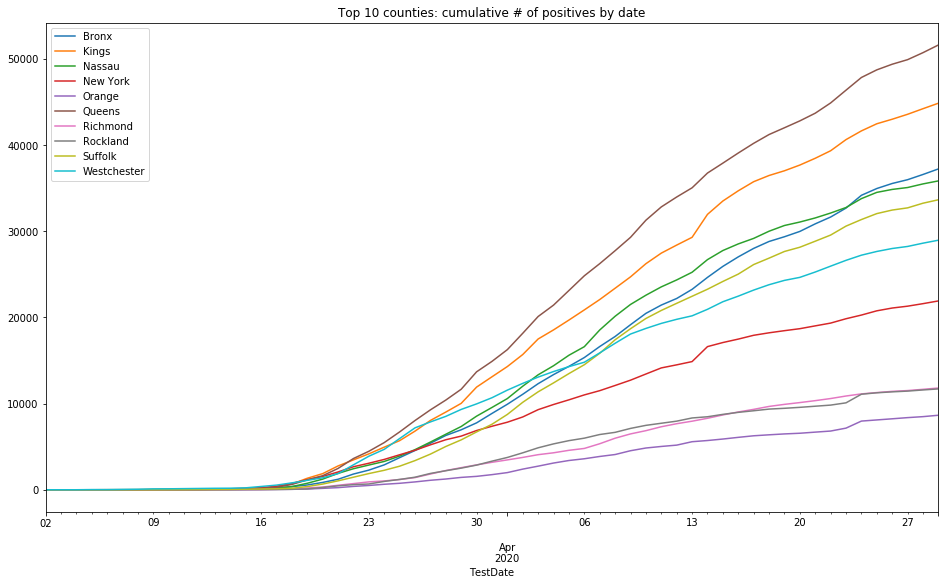

In [6]:
fig, ax = plt.subplots(figsize=(16, 9))
for label, groupdf in df[df.County.isin(top_counties)].groupby('County'):
    groupdf.plot('TestDate', 'CumulativeNumberOfPositives', ax=ax, label=label)

ax.set_title('Top 10 counties: cumulative # of positives by date')